In [9]:
import importlib
try:
    importlib.reload(utils)
    importlib.reload(coords)
    importlib.reload(bot_base)
except NameError:
    # first execution, most likely
    pass 
import utils
import coords
import bot_base
from utils import *
from coords import *
from bot_base import *
import numpy as np
import cv2

In [7]:
stats = {
    'energy': {
        'base_power': 6.9,
        'equip_power_modifier': 1.37,
        'bars': 11,
        'equip_bars_modifier': 1,
        'cap': 450000,
        'equip_cap_modifier': 1,
        'base_speed': 32.5,
        'equip_speed_modifier': 1.54
    },
    'magic': {
        'base_power': 1,
        'equip_power_modifier': 1.00,
        'bars': 1,
        'equip_bars_modifier': 1,
        'cap': 10000,
        'equip_cap_modifier': 1,
        'base_speed': 3.3,
        'equip_speed_modifier': 1.00
    }
}

In [14]:
find_bbox_coords(["inventory_6"])

('inventory_6', (786, 542, 835, 589)),


In [15]:
bbox_i6 = (786, 542, 835, 589)

In [38]:
img = screenshot(bbox_i6)
tmpl = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
tmpl

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [22]:
template.shape[::-1]

(3, 49, 47)

In [30]:
tmpl = cv2.imread("chedder.png")
print(type(tmpl))
print(tmpl.shape[:2])

<class 'numpy.ndarray'>
(53, 54)


In [35]:
cv2.imread?

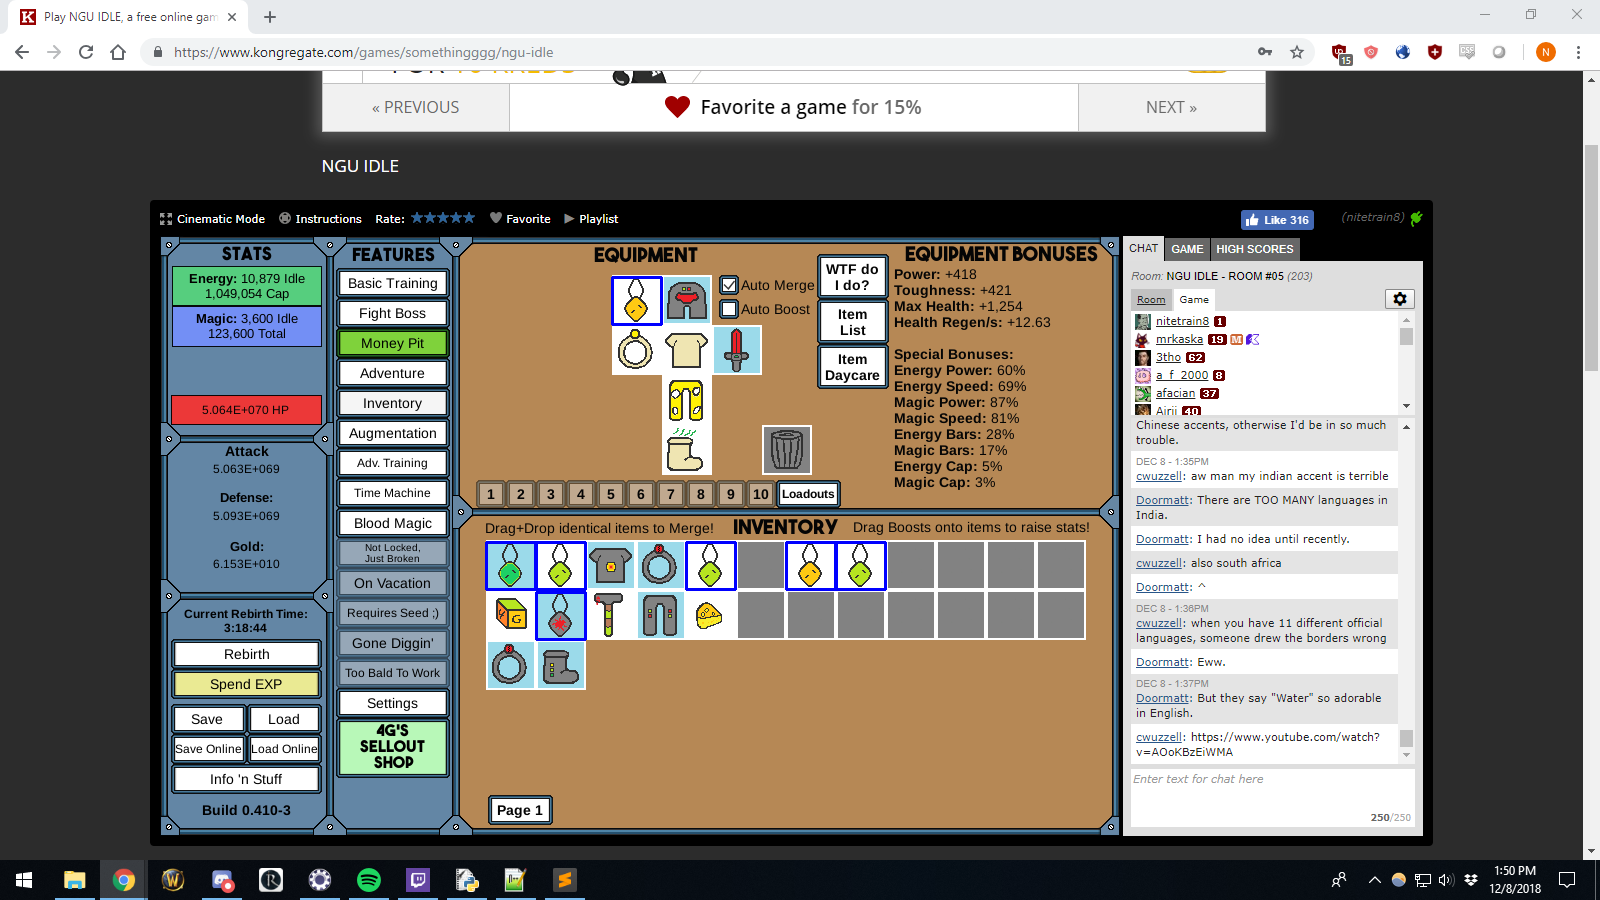

In [60]:
img_rgb = np.array(screenshot())
img_gray = cv2.cvtColor((img_rgb), cv2.COLOR_BGR2GRAY)
template = tmpl
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#cv2.imshow("test", img_rgb)
PIL.Image.fromarray(img_rgb)

In [70]:
img_rgb.shape

(900, 1600, 3)

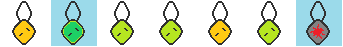

In [72]:
ys, xs = loc
imgs = []
aimg = Image.new('RGB', (w*len(xs), h))
for i, (x, y) in enumerate(zip(xs, ys)):
    img = screenshot((x, y, x+w, y+h))
    aimg.paste(img, (w*i, 0))
aimg

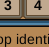

In [66]:
screenshot((x-w, y-h, x, y))